# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Kenny Dong Jie Zhu Ye, Samir David Mercado Blanco
*   Código: 200164380, 200161553


In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

La reacción química irreversible en la que dos moléculas de dicromato de potasio sólido ($K_{2}Cr_{2}O_{7}$), dos moléculas de agua ($H_{2}O$) y tres átomos de azufre sólido ($S$) se combinan para producir tres moléculas de el dióxido de azufre gaseoso ($SO_{2}$), cuatro moléculas de hidróxido de potasio sólido ($KOH$) y dos moléculas de óxido de cromo sólido ($Cr_{2}O_{3}$) se puede representar simbólicamente mediante la ecuación estequiométrica:

$$2K_{2}Cr_{2}O_{7}+2H_{2}O+3S ⟶ 4KOH + 2Cr_{2}O_{3} + 3SO_{2}$$

Si $n_{1}$ moleculas de $K_{2}Cr_{2}O_{7}$, $n_{2}$ moléculas de $H_{2}O$, y $n_{3}$ moléculas de $S$ están disponibles originalmente, la siguiente ecuación diferencial describe la cantidad $x(t)$ de $KOH$ en el tiempo $t$:

$$\frac{dx}{dt} = k \left ( n_{1}-\frac{x}{2} \right )^2\left (n_{2}-\frac{x}{2}\right )^2\left (n_{3} - \frac{3x}{4}\right )^3$$
donde $k$ es la velocidad constante de la reacción si $k = 6.22 \times 10^{-19}$, $n_{1}=n_{2}=2\times 10^{3}$, y $n_{3}=3\times 10^{3}$, use el método de Runge-Kutta de orden cuatro para determinar cuántas unidades de hidróxido de potasio hay después de 0.2 $s$.

In [27]:
def runge_kutta_4(f, a, b, h, w0, *args):
    n = int((b - a) / h)
    w = [w0]
    t = a
    for _ in range(n):
        k1 = f(t, w[-1], *args)
        k2 = f(t + h / 2, w[-1] + h * k1 / 2, *args)
        k3 = f(t + h / 2, w[-1] + h * k2 / 2, *args)
        k4 = f(t + h, w[-1] + h * k3, *args)
        w_next = w[-1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w.append(w_next)
        t += h
    return np.array(w)

In [28]:
def f(t, x, k, n1, n2, n3):
    return k * (n1 - x / 2)**2 * (n2 - x / 2)**2 * (n3 - 3 * x / 4)**3

x0 = 0
t0 = 0
tf = 0.2
h = 0.001
k = 6.22e-19
n1 = n2 = 2e3
n3 = 3e3

result = runge_kutta_4(f, t0, tf, h, x0, k, n1, n2, n3)

print(f"\nLa cantidad de hidróxido de potasio (KOH) después de 0.2s es: {result[-1]}")


La cantidad de hidróxido de potasio (KOH) después de 0.2s es: 2079.408617307593


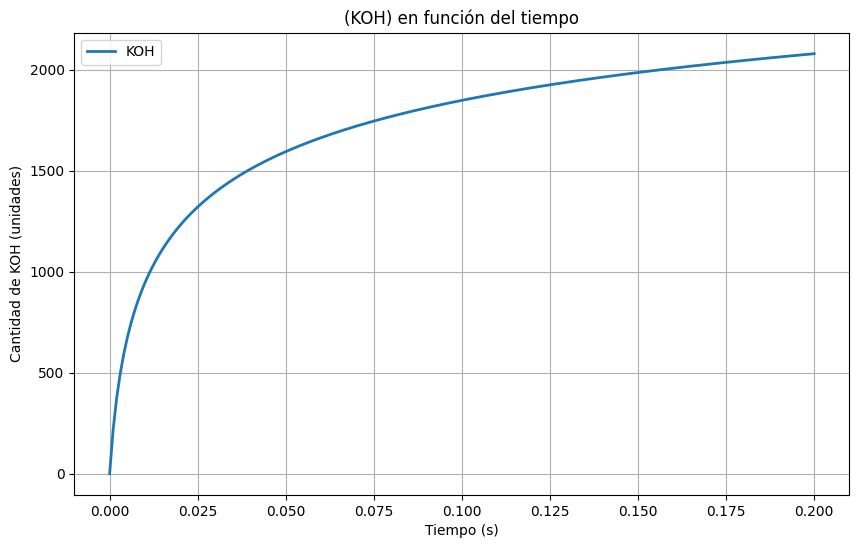

In [29]:
t_values = np.arange(t0, tf + h, h)

plt.figure(figsize=(10, 6))
plt.plot(t_values, result, label='KOH', linewidth=2)
plt.title("(KOH) en función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Cantidad de KOH (unidades)")
plt.legend()
plt.grid()
plt.show()

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte ([pdf](https://guayacan.uninorte.edu.co/normatividad_interna/upload/File/Guia_Prevencion_Fraude%20estudiantes(5).pdf)).